# Testing KNN and NB on Churn Prediction dataset 

In [72]:
# fisrt of all we are importing basic datasets 

In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [74]:
#importing the datasets 
data = pd.read_csv("C:\\Users\\tshynarbekova\\OneDrive - Schlumberger\\Desktop\\ML_by_Park\\final project\\telecom_users.csv")
data .head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [75]:
# traying to understand data

data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [76]:
data.shape

(5986, 22)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [78]:
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [79]:
data=data.drop("Unnamed: 0", axis=1)

In [80]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [81]:
data["customerID"]=data.customerID.str.split('-').str[0]
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,8044,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,7450,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [82]:
data_cols=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
num_cols= ['SeniorCitizen', 'tenure', 'MonthlyCharges']

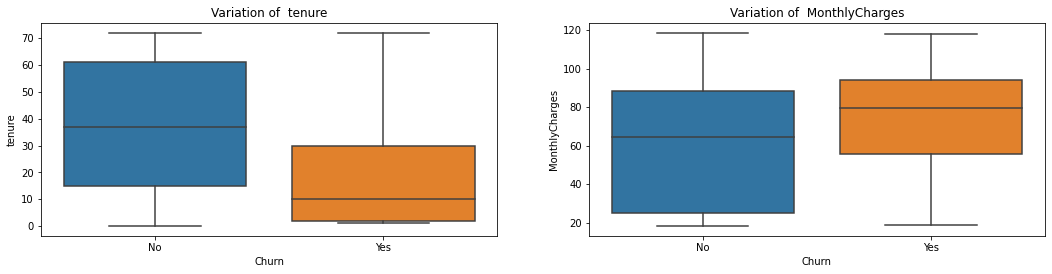

In [83]:
plt.figure(figsize=(18, 18))
n=1
for col in ['tenure', 'MonthlyCharges']:
    plt.subplot(4,2,n)
    sns.boxplot(x='Churn', y= col, data=data)
    plt.title('Variation of  ' + col)
    n=n+1
    
    
#Below we can see the tendency, relation between tenture and charn label 

In [84]:
# Converting customer ID from object data type into numeric data 

def convert_x(x): 
    try: 
        return float(x) 
    except: 
        return np.NAN
data["TotalCharges"]=data["TotalCharges"].apply(convert_x)
data["customerID"]=data["customerID"].apply(convert_x)

In [85]:
x=data["TotalCharges"].median()
data["TotalCharges"]= data["TotalCharges"].fillna(x)

In [86]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [88]:
for i in data_cols: 
    data[i]=le.fit_transform(data[i])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010.0,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1734.65,No
1,9688.0,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,3973.20,No
2,9286.0,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2869.85,Yes
3,6994.0,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,238.50,No
4,2181.0,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,684.0,1,0,1,0,1,1,0,1,2,...,0,0,2,2,0,1,2,95.00,95.00,Yes
5982,5982.0,0,0,1,1,23,1,2,0,2,...,2,2,2,2,2,1,1,91.10,2198.30,No
5983,8044.0,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,21.15,306.05,No
5984,7450.0,1,1,0,0,12,1,2,1,0,...,2,0,2,2,0,1,2,99.45,1200.15,Yes


In [89]:
data["Churn"]=le.fit_transform(data["Churn"])

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   float64
 1   gender            5986 non-null   int32  
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   int32  
 4   Dependents        5986 non-null   int32  
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   int32  
 7   MultipleLines     5986 non-null   int32  
 8   InternetService   5986 non-null   int32  
 9   OnlineSecurity    5986 non-null   int32  
 10  OnlineBackup      5986 non-null   int32  
 11  DeviceProtection  5986 non-null   int32  
 12  TechSupport       5986 non-null   int32  
 13  StreamingTV       5986 non-null   int32  
 14  StreamingMovies   5986 non-null   int32  
 15  Contract          5986 non-null   int32  
 16  PaperlessBilling  5986 non-null   int32  


  #### Above we can see that our all features have numeric type(int or float ), here no feature with object type. Cool, so then we can to move splitting and prepere data to ML algorithms

In [91]:
X=data.iloc[:, :-1].values
y=data.iloc[:, -1].values
#splitting the data 

In [92]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010.0,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1734.65,0
1,9688.0,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,3973.20,0
2,9286.0,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2869.85,1
3,6994.0,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,238.50,0
4,2181.0,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,684.0,1,0,1,0,1,1,0,1,2,...,0,0,2,2,0,1,2,95.00,95.00,1
5982,5982.0,0,0,1,1,23,1,2,0,2,...,2,2,2,2,2,1,1,91.10,2198.30,0
5983,8044.0,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,21.15,306.05,0
5984,7450.0,1,1,0,0,12,1,2,1,0,...,2,0,2,2,0,1,2,99.45,1200.15,1


In [113]:
# splitting data set into training set and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0, stratify=data.Churn.values )

# Testing the Naive Bayes algorithm

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
classifier_2 = GaussianNB()
classifier_2.fit(X_train, y_train)

GaussianNB()

In [115]:
y_pred_2 = classifier_2.predict(X_test)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1)) 

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [116]:
conf_matrix = confusion_matrix(y_test, y_pred_2)
print("Confusion matrix is: \n", conf_matrix)

print("Accuracy is: ", round(accuracy_score(y_test, y_pred_2), 3))

Confusion matrix is: 
 [[988 332]
 [111 365]]
Accuracy is:  0.753


In [117]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.46


# Testing the KNN algorithm 

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier_3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_3.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
y_pred_3 = classifier_3.predict(X_test)
print(np.concatenate((y_pred_3.reshape(len(y_pred_3),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [120]:
conf_matrix_ = confusion_matrix(y_test, y_pred_3)
print("Confusion matrix: \n", conf_matrix_)
print("Accuracy is: \n", round(accuracy_score(y_test, y_pred_3), 2) )

Confusion matrix: 
 [[1181  139]
 [ 371  105]]
Accuracy is: 
 0.72


In [121]:
average_precision = average_precision_score(y_test, y_pred_3)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.30
